In [14]:
#Imports and Setup
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('default')

In [15]:
#Load Dataset
df = pd.read_csv('Titanic_train.csv')
print('Dataset shape:', df.shape)
print(df.head(10))

Dataset shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, 

In [16]:

#  Basic Information and Statistics
print('\nDataFrame info:')
df.info()
print('\nSummary Statistics:')
print(df.describe(include='all'))


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary Statistics:
        PassengerId    Survived      Pclass                 Name   Sex  \
count    891.000000  891.000000  891.000000                  891   891   
unique          NaN         NaN         NaN               

In [17]:
#Missing Values Check
print('\nMissing Values per Column:')
print(df.isnull().sum())


Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


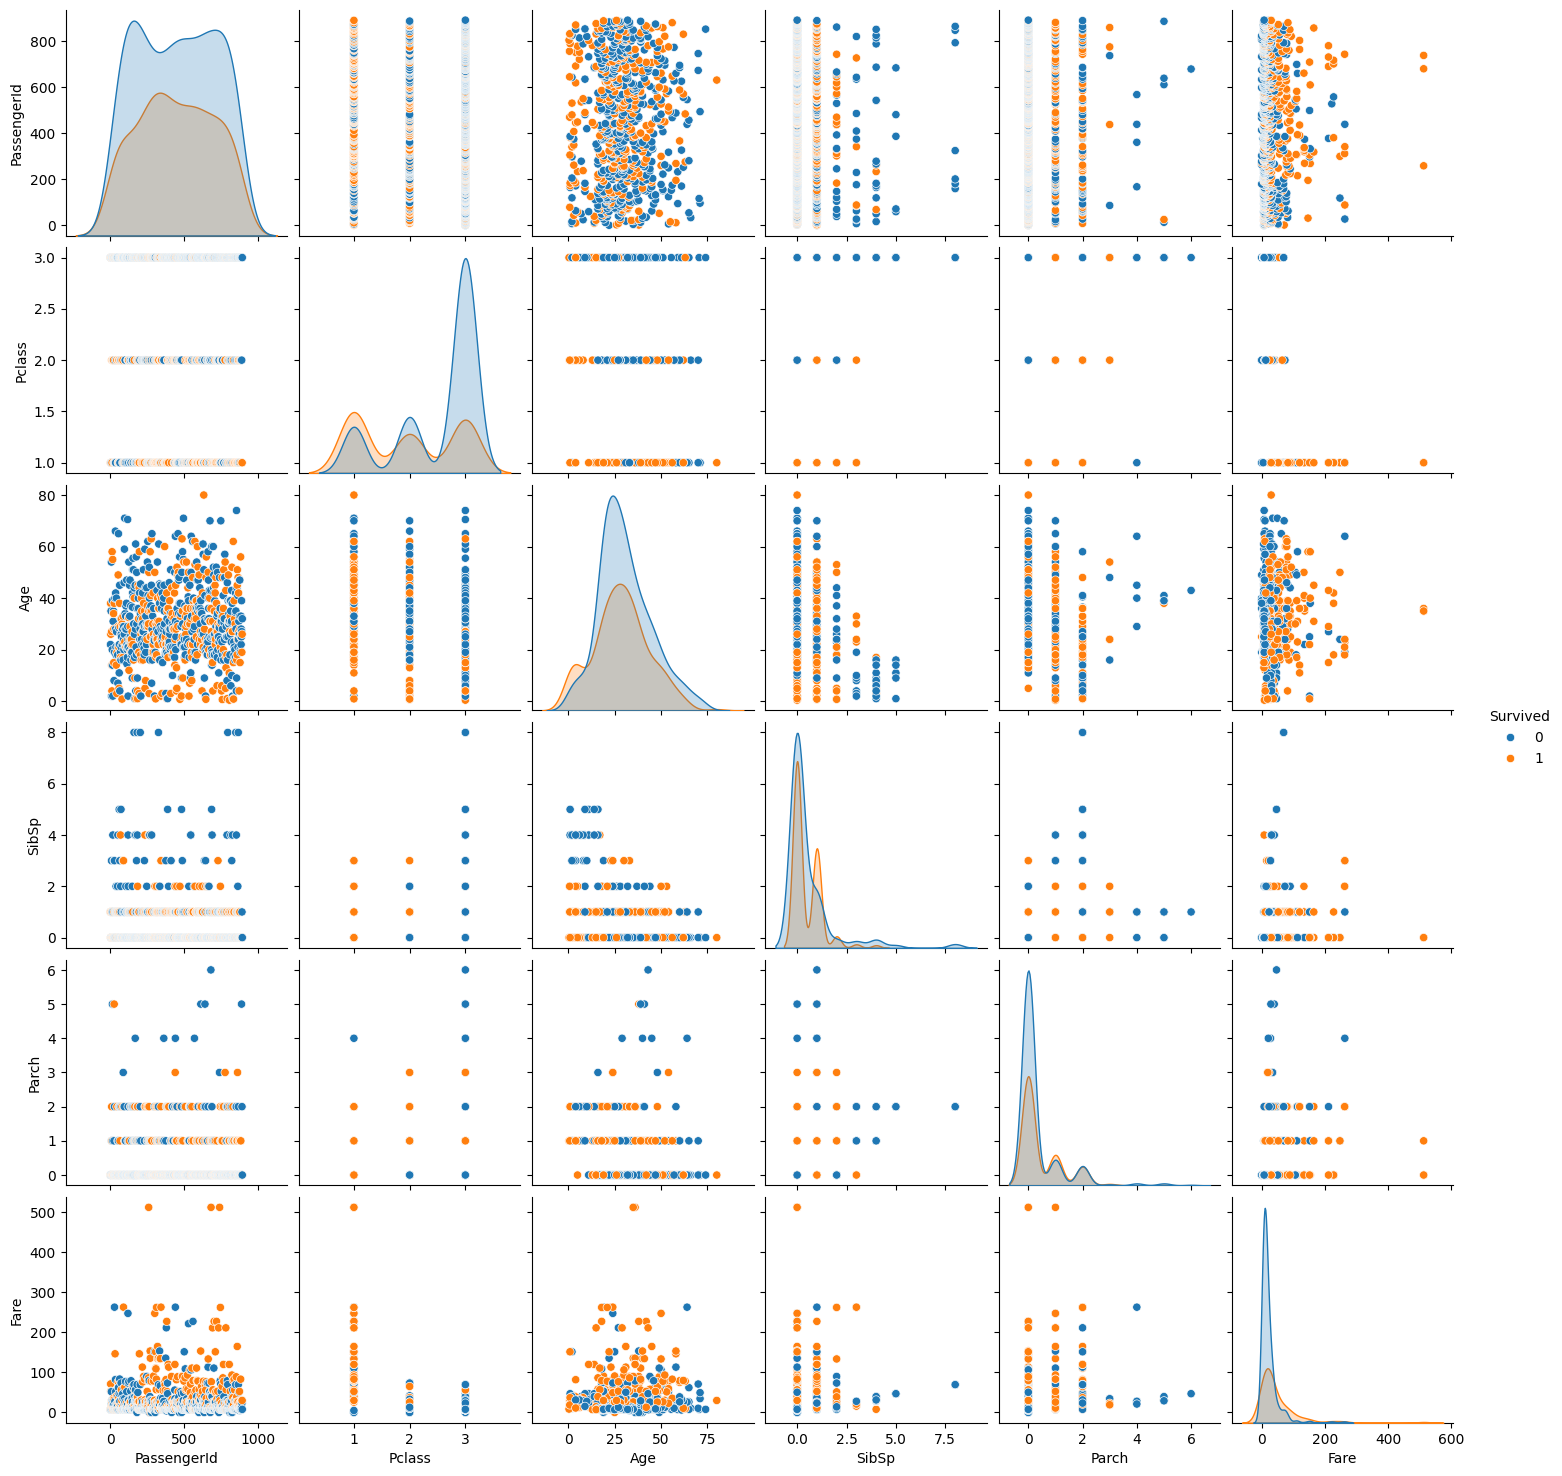

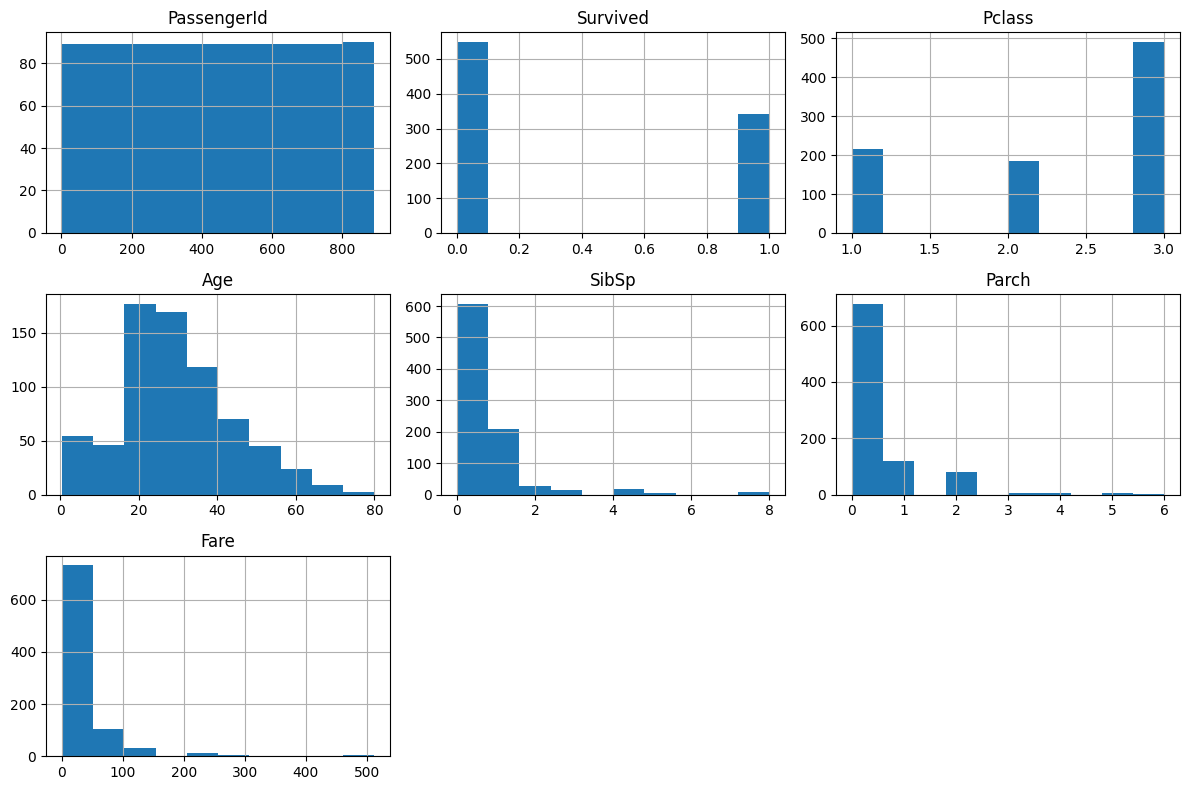

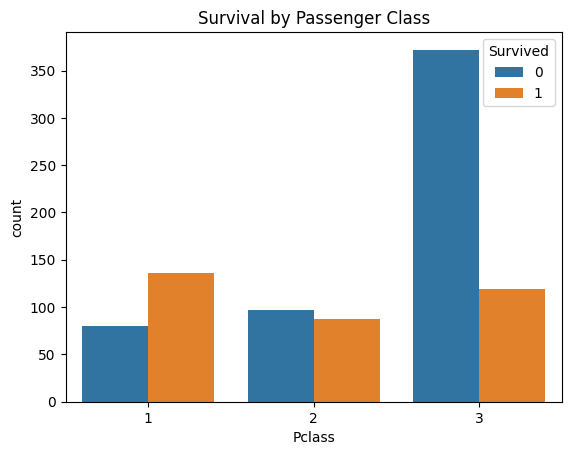

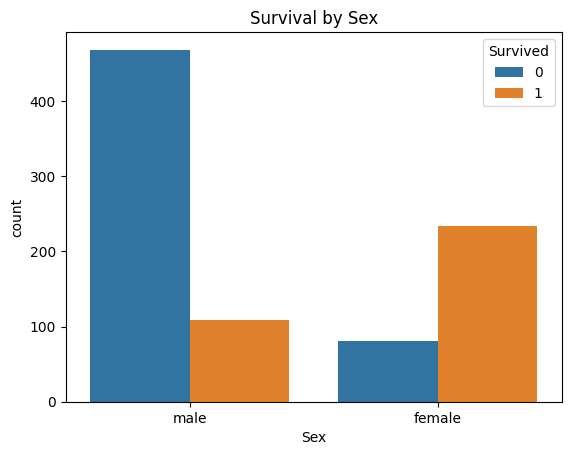

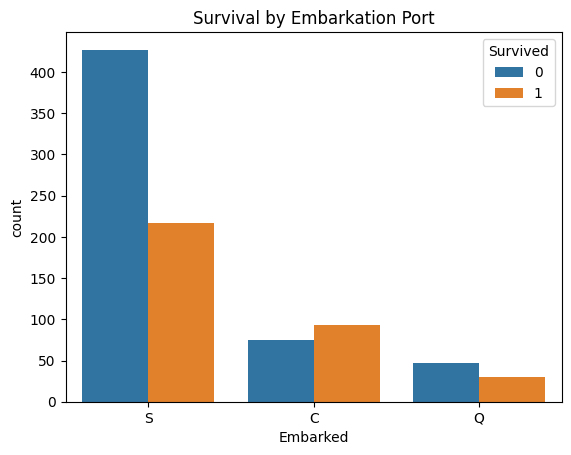

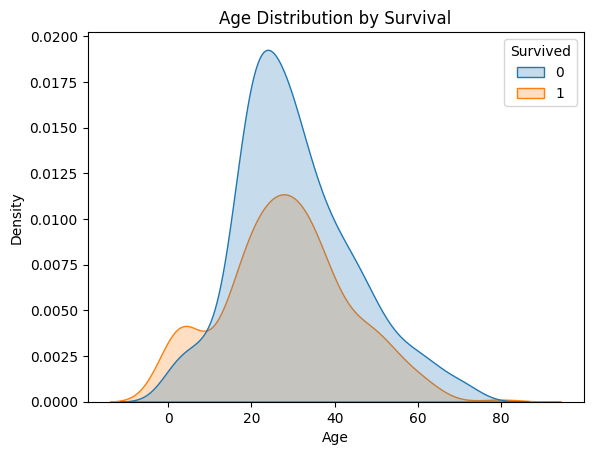

In [20]:
#Exploratory Data Analysis
numeric_cols = df.select_dtypes(include=[np.number])
sns.pairplot(numeric_cols.assign(Survived=df['Survived']), hue='Survived')
plt.show()


df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()


sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Sex')
plt.show()


sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival by Embarkation Port')
plt.show()


sns.kdeplot(data=df, x='Age', hue='Survived', fill=True)
plt.title('Age Distribution by Survival')
plt.show()

In [22]:
#Outlier Detection
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
  if col == 'PassengerId':
    continue
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = df[(df[col] < lower) | (df[col] > upper)]
print(f'{col}: {len(outliers)} outliers')

Fare: 116 outliers


In [23]:
#Data Preprocessing
df['Age'].fillna(df['Age'].mean(), inplace=True)
if 'PassengerId' in df.columns:
  df.drop('PassengerId', axis=1, inplace=True)


  for col in ['Cabin', 'Embarked']:
    if col in df.columns:
      df[col].fillna(df[col].mode()[0], inplace=True)


print('\nMissing Values after Preprocessing:')
print(df.isnull().sum())


Missing Values after Preprocessing:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64


In [25]:
#Encoding Categorical Variables
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
if 'Sex' in df.columns and 'Sex' not in categorical_cols:
  categorical_cols.append('Sex')


df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print('Encoded DataFrame Shape:', df_encoded.shape)
print(df_encoded.head())

Encoded DataFrame Shape: (891, 1725)
   Survived  Pclass   Age  SibSp  Parch     Fare  \
0         0       3  22.0      1      0   7.2500   
1         1       1  38.0      1      0  71.2833   
2         1       3  26.0      0      0   7.9250   
3         1       1  35.0      1      0  53.1000   
4         0       3  35.0      0      0   8.0500   

   Name_Abbott, Mr. Rossmore Edward  Name_Abbott, Mrs. Stanton (Rosa Hunt)  \
0                             False                                  False   
1                             False                                  False   
2                             False                                  False   
3                             False                                  False   
4                             False                                  False   

   Name_Abelson, Mr. Samuel  Name_Abelson, Mrs. Samuel (Hannah Wizosky)  ...  \
0                     False                                       False  ...   
1                    

In [26]:
#Model Preparation and Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


y = df_encoded['Survived']
X = df_encoded.drop('Survived', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

Accuracy: 0.8268

Confusion Matrix:
 [[92 13]
 [18 56]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

ROC AUC: 0.8994


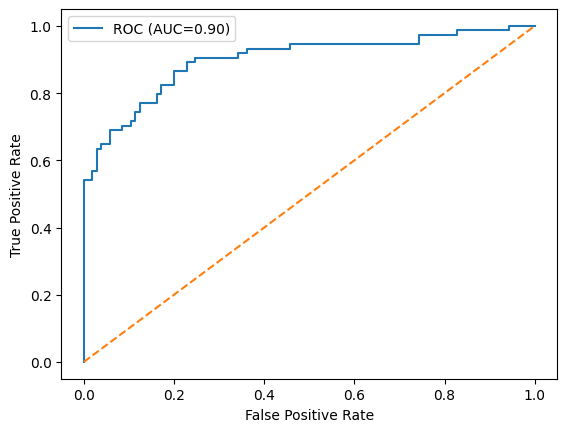

In [27]:
#Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)


print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:\n', conf_mat)
print('\nClassification Report:\n', class_rep)


if hasattr(model, 'predict_proba'):
  prob_pos = model.predict_proba(X_test)[:, 1]
  roc_auc = roc_auc_score(y_test, prob_pos)
  print(f'ROC AUC: {roc_auc:.4f}')
  fpr, tpr, _ = roc_curve(y_test, prob_pos)
  plt.plot(fpr, tpr, label=f'ROC (AUC={roc_auc:.2f})')
  plt.plot([0,1], [0,1], linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

In [28]:
#Model Interpretation
coeff_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_[0]})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print('\nTop Positive Influences:\n', coeff_df.head(10))
print('\nTop Negative Influences:\n', coeff_df.tail(10))


Top Positive Influences:
                              Feature  Coefficient
975                      Ticket_1601     1.531443
1457               Ticket_C.A. 37671     1.091266
1132                    Ticket_29106     0.932664
1336                   Ticket_367226     0.911921
1239                   Ticket_347742     0.877265
1224                   Ticket_347077     0.859873
1550        Ticket_STON/O 2. 3101269     0.773547
796   Name_Sundman, Mr. Johan Julian     0.773547
1558        Ticket_STON/O 2. 3101289     0.750679
596          Name_Niskanen, Mr. Juha     0.750679

Top Negative Influences:
                                 Feature  Coefficient
1202                      Ticket_345773    -0.760138
21    Name_Allison, Miss. Helen Loraine    -0.765388
1232                      Ticket_347088    -0.792835
1211                      Ticket_347054    -0.793344
0                                Pclass    -0.801889
1088                        Ticket_2665    -0.817596
1637                     

The coefficients of a logistic regression model indicate the change in the log-odds of the outcome variable for a one-unit increase in the predictor variable, assuming all other variables are held constant.

- **Positive coefficients**: Suggest that as the predictor variable increases, the log-odds of the passenger surviving increases. This means the probability of survival also increases.
- **Negative coefficients**: Suggest that as the predictor variable increases, the log-odds of the passenger surviving decreases. This means the probability of survival also decreases.

Examining the coefficients helps identify which features have the strongest positive or negative association with the likelihood of survival. The magnitude of the coefficient reflects the strength of this association.

##Deployement of the Model

In [32]:
!pip install streamlit pyngrok pandas scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 72.3 MB/s eta 0:00:00


In [33]:
import joblib

# Save the trained model
joblib.dump(model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [35]:
# Save the training columns to a file
joblib.dump(X_train.columns, 'training_columns.joblib')

['training_columns.joblib']

Below is the code for app.py

In [36]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# Load the trained model
model = joblib.load('logistic_regression_model.joblib')

st.title('Titanic Survival Prediction')

st.write("""
Predict the survival of a passenger on the Titanic.
""")

# Input features from the user
pclass = st.selectbox('Passenger Class', [1, 2, 3])
sex = st.selectbox('Sex', ['female', 'male'])
age = st.slider('Age', 0, 100, 30)
sibsp = st.slider('Number of Siblings/Spouses Aboard', 0, 8, 0)
parch = st.slider('Number of Parents/Children Aboard', 0, 6, 0)
fare = st.number_input('Fare', value=50.0)
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])

# Create a DataFrame from user inputs
input_data = pd.DataFrame({
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked': [embarked]
})

# Perform the same preprocessing as done during training

# Handle missing values for Age (fill with mean)
input_data['Age'].fillna(input_data['Age'].mean(), inplace=True)

# Handle missing values for Embarked (fill with mode)
input_data['Embarked'].fillna(input_data['Embarked'].mode()[0], inplace=True)


# One-hot encode categorical features - need to make sure columns match the training data
# This requires access to the columns from the training data's one-hot encoding
# For simplicity, let's assume the columns from the training data are available
# In a real deployment, you would save the list of columns or the OneHotEncoder object
# Here, we'll create dummy columns based on the possible values
sex_encoded = pd.get_dummies(input_data['Sex'], prefix='Sex', drop_first=True)
embarked_encoded = pd.get_dummies(input_data['Embarked'], prefix='Embarked', drop_first=True)

# Drop original categorical columns and concatenate encoded ones
input_data = input_data.drop(['Sex', 'Embarked'], axis=1)
input_data = pd.concat([input_data, sex_encoded, embarked_encoded], axis=1)

# Align columns with the training data (add missing columns with value 0)
# This is a simplified approach. A robust solution would use the columns from X_train_split
# For demonstration, let's assume the training columns are available in a variable called 'training_columns'
# Replace 'training_columns' with the actual variable name from your notebook if available
# If not available, you would need to save and load this list along with the model
training_columns = joblib.load('training_columns.joblib') # Assuming you save this list

for col in training_columns:
    if col not in input_data.columns:
        input_data[col] = 0

input_data = input_data[training_columns] # Ensure the order of columns is the same


# Make prediction
if st.button('Predict Survival'):
    prediction = model.predict(input_data)
    prediction_proba = model.predict_proba(input_data)[:, 1]

    if prediction[0] == 1:
        st.success(f'The passenger is likely to survive with a probability of {prediction_proba[0]:.2f}')
    else:
        st.error(f'The passenger is not likely to survive with a probability of {prediction_proba[0]:.2f}')

Overwriting app.py


In [37]:
from pyngrok import ngrok
import time
import threading
import os
import subprocess

# Set your real ngrok authtoken
!ngrok authtoken 345l7kKMQnjJuqOYVU2XEZWbdE0_x2qdFethjWzpkXPG3PWj


# Function to run Streamlit in background
def run_streamlit():
    os.system("streamlit run app.py --server.port 8501 --server.headless true")

# Start Streamlit in a separate thread
threading.Thread(target=run_streamlit).start()

# Wait for Streamlit to start
time.sleep(5)

# Open ngrok tunnel
public_url = ngrok.connect(addr=8501, proto="http")
print("Your Streamlit app is live at:", public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Your Streamlit app is live at: NgrokTunnel: "https://annalistically-unbeseeming-jazmine.ngrok-free.dev" -> "http://localhost:8501"
